Descarga de tabla de empresas en el sp500

In [1]:
import urllib.request
from html_table_parser import HTMLTableParser
import pandas as pd
import numpy as np
import datetime
import numpy as np
import matplotlib.pyplot as plt
import copy
import mplfinance as mpf
mpf.__version__

'0.12.9b1'

In [2]:
# Funcion para obtener contenido de un sitio web
def url_get_contents(url):
    req = urllib.request.Request(url = url)
    f = urllib.request.urlopen(req)
    return f.read()

In [3]:
# Enlace
xhtml = url_get_contents('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies').decode('utf-8') 
p = HTMLTableParser()
p.feed(xhtml)

In [4]:
col = ['Security', 'Sector']

stocks = {
    "Security" : [],
    "Sector" : []
}

Symbol = []

In [5]:
first = False
for company in p.tables[0]:
    if first:
        stocks['Security'].append(company[1])
        stocks['Sector'].append(company[3])
        Symbol.append(company[0])
        pass
    else:
        first = True

In [6]:
sp500 = pd.DataFrame(stocks,
    index = Symbol,
    columns = col
    )

In [7]:
sp500.head()

,Security,Sector
MMM,3M,Industrials
AOS,A. O. Smith,Industrials
ABT,Abbott,Health Care
ABBV,AbbVie,Health Care
ABMD,Abiomed,Health Care


In [8]:
sp500.drop('CEG', inplace=True)

In [9]:
#sp500 = sp500[:20]

Obtener el historial de precios

In [10]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

In [11]:
# array de historial
stocks_history = []

# Inicializamos los data frame
z = pdr.get_data_yahoo('zzz', start="2000-01-01", end="2021-12-31")
for i in range(0,sp500.index.shape[0]):
    stocks_history.append(z)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ZZZ: No data found, symbol may be delisted


In [16]:
# Añadimos excepciones
stocks_history[64] = (pdr.get_data_yahoo('BRK-B', start="2000-01-01", end="2021-12-31"))
stocks_history[80] = (pdr.get_data_yahoo('BF-B', start="2000-01-01", end="2021-12-31"))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [17]:
# download dataframe
#samples = 0
for idx, symbol in enumerate(sp500.index):
    if stocks_history[idx].shape[0] == 0:
        stocks_history[idx] = pdr.get_data_yahoo(symbol, start="2000-01-01", end="2021-12-31")
        #samples+=1
    #else:
    #    break


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Agregar columnas para analisis

In [18]:
#stocks_history[25].index.day_name()

In [19]:
for idx, stock in enumerate(stocks_history):
    #print(idx)
    # Columna del dia de la semana: DayOfWeek
    stocks_history[idx]['DayOfWeek'] = stocks_history[idx].index.day_name()

    # Columna de los retornos gap_logs
    stocks_history[idx]['retornos_gaps_logs'] =np.log(stocks_history[idx].Open/stocks_history[idx].Close.shift(1)).fillna(0)

    # Columna de los retornos gap
    stocks_history[idx]['retornos_gaps'] = (stocks_history[idx].Open/stocks_history[idx].Close.shift(1)).fillna(0)

    #mmm['retorno_intradia'] = np.log(mmm.Close/mmm.Open).fillna(0)
    # Retorno Intraday Log
    stocks_history[idx]['intraday_log'] =np.log(stocks_history[idx].Close/stocks_history[idx].Open).fillna(0)
    # Retorno Intraday
    stocks_history[idx]['intraday'] =(stocks_history[idx].Close/stocks_history[idx].Open).fillna(0)

In [20]:
# Producto de un array
def producto_array(l):
    producto = 1
    for i in l:
        producto*=i
    return producto

Rendimiento gap e intradia

In [21]:
# Matrices de rendimiento gap
rGap = np.zeros((len(stocks_history),5))
rGapLog = np.zeros((len(stocks_history),5))

# Matrices rendimiento intradiario
rIntra = np.zeros((len(stocks_history),5))
rIntraLog = np.zeros((len(stocks_history),5))

# Dias de la semana
dias = np.array(['Monday','Tuesday','Wednesday','Thursday','Friday'])

In [22]:
# r_gap[idx] = mmm.retornos_gaps_logs[mmm.DayOfWeek == day][1:].sum()
for idx, stock in enumerate(stocks_history):
    for idy, day in enumerate(dias):
        # Rendimientos gap
        rGap[idx][idy] = stock.retornos_gaps_logs[stock.DayOfWeek == day][1:].sum()
        #rGapLog[idx][idy] = producto_array(stock.retornos_gaps[stock.DayOfWeek == day][1:])

        # Rendimientos intradiario
        rIntra[idx][idy] = stock.intraday_log[stock.DayOfWeek == day][1:].sum()
        #rIntraLog[idx][idy] = producto_array(stock.intraday[stock.DayOfWeek == day][1:])

In [23]:
rGapLog-=1

Boxplot dias mas rentables

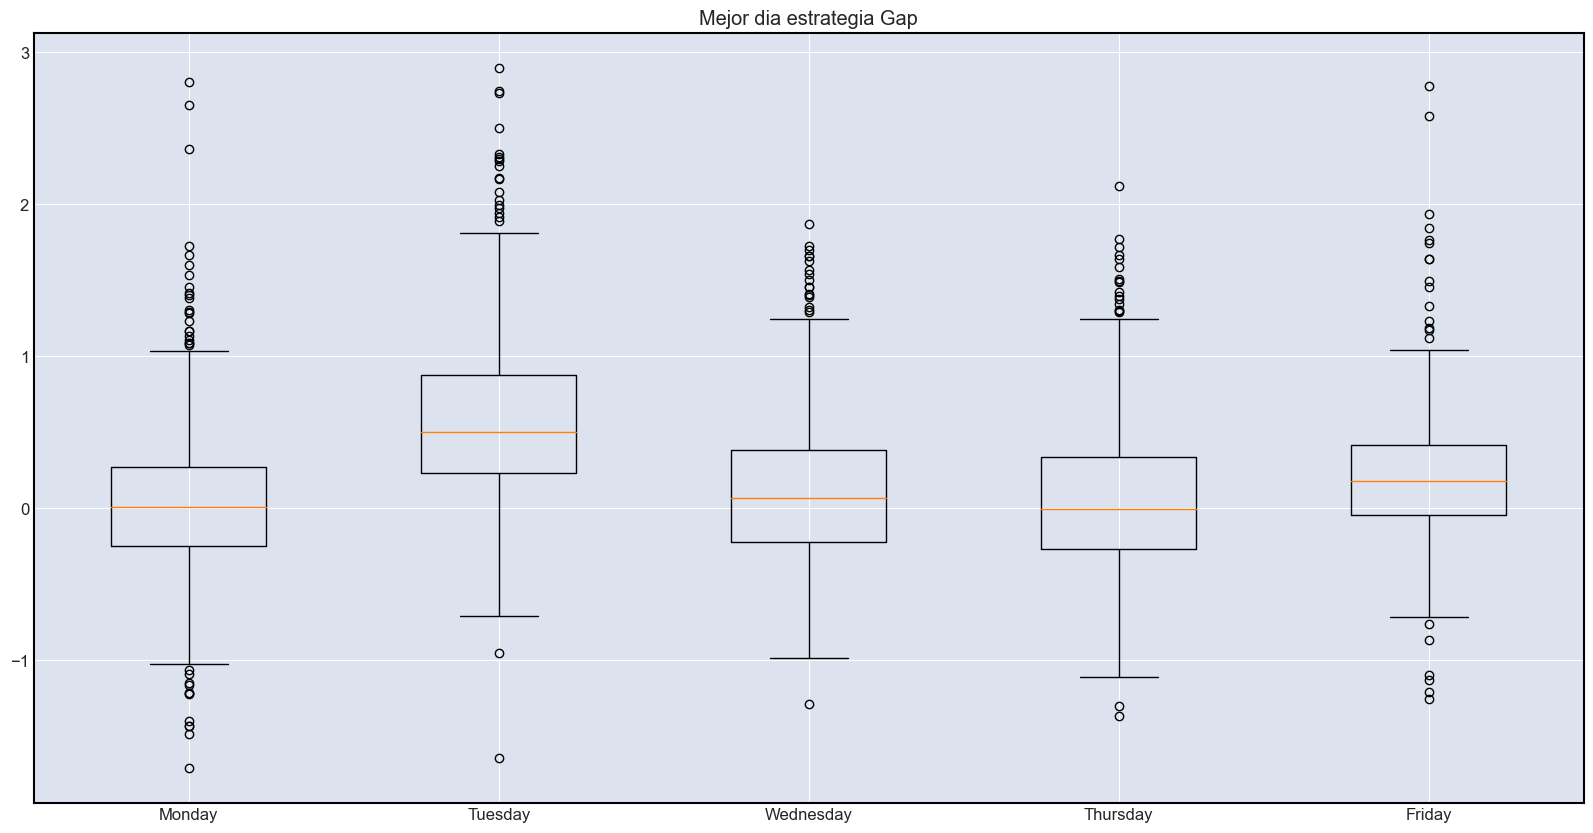

In [84]:
# gap
fig = plt.figure(figsize =(20, 10))
plt.boxplot(rGap)
plt.title('Mejor dia estrategia Gap')
plt.xticks([1,2,3,4,5], dias)

# gapLog
#fig1 = plt.figure(figsize =(10, 7))
#plt.boxplot(rGapLog)
#plt.xticks([1,2,3,4,5], dias)

plt.show()

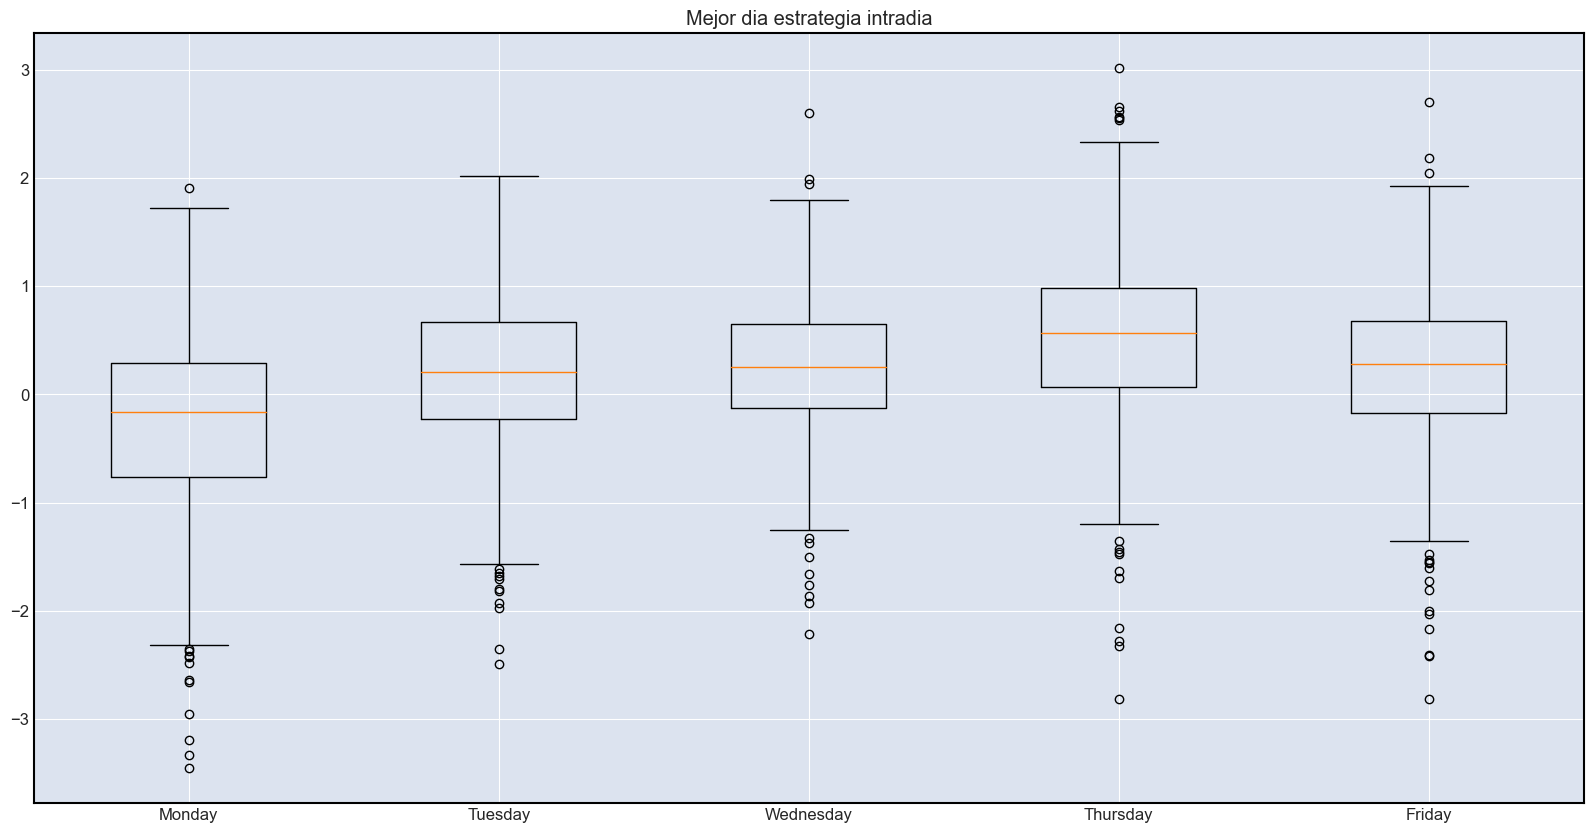

In [85]:
# intraday
fig = plt.figure(figsize =(20, 10))
plt.boxplot(rIntra)
plt.title("Mejor dia estrategia intradia")
plt.xticks([1,2,3,4,5], dias)

# intraday Log
#fig1 = plt.figure(figsize =(10, 7))
#plt.boxplot(rIntraLog)
#plt.xticks([1,2,3,4,5], dias)

plt.show()

Indice de volatilidad

In [26]:
#mmm['Variaciones'] = mmm['Adj Close'].pct_change()
#mmm['Volatilidad'] = mmm.Variaciones.rolling(250).std()*100*(250)**0.5

for idx, stock in enumerate(stocks_history):
    variaciones = stock['Adj Close'].pct_change()
    stocks_history[idx]['Volatilidad'] = variaciones.rolling(250).std()*100*(250)**0.5

In [27]:
stocks_history[0].head()

,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,retornos_gaps_logs,retornos_gaps,intraday_log,intraday,Volatilidad
Date,,,,,,,,,,,,
2000-01-03,48.03125,48.25000,47.03125,47.1875,26.434847,2173400,Monday,0.000000,0.000000,-0.017723,0.982433,NaN
2000-01-04,46.43750,47.40625,45.31250,45.3125,25.384457,2713800,Tuesday,-0.016022,0.984106,-0.024524,0.975774,NaN
2000-01-05,45.56250,48.12500,45.56250,46.6250,26.119749,3699400,Wednesday,0.005502,1.005517,0.023052,1.023320,NaN
2000-01-06,47.15625,51.25000,47.15625,50.3750,28.220518,5975800,Thursday,0.011330,1.011394,0.066028,1.068257,NaN
2000-01-07,50.56250,51.90625,49.96875,51.3750,28.780733,4101200,Friday,0.003715,1.003722,0.015941,1.016069,NaN


In [28]:
sp500.index[0:13]

Index(['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE',
       'ADP', 'AAP', 'AES', 'AFL'],
      dtype='object')

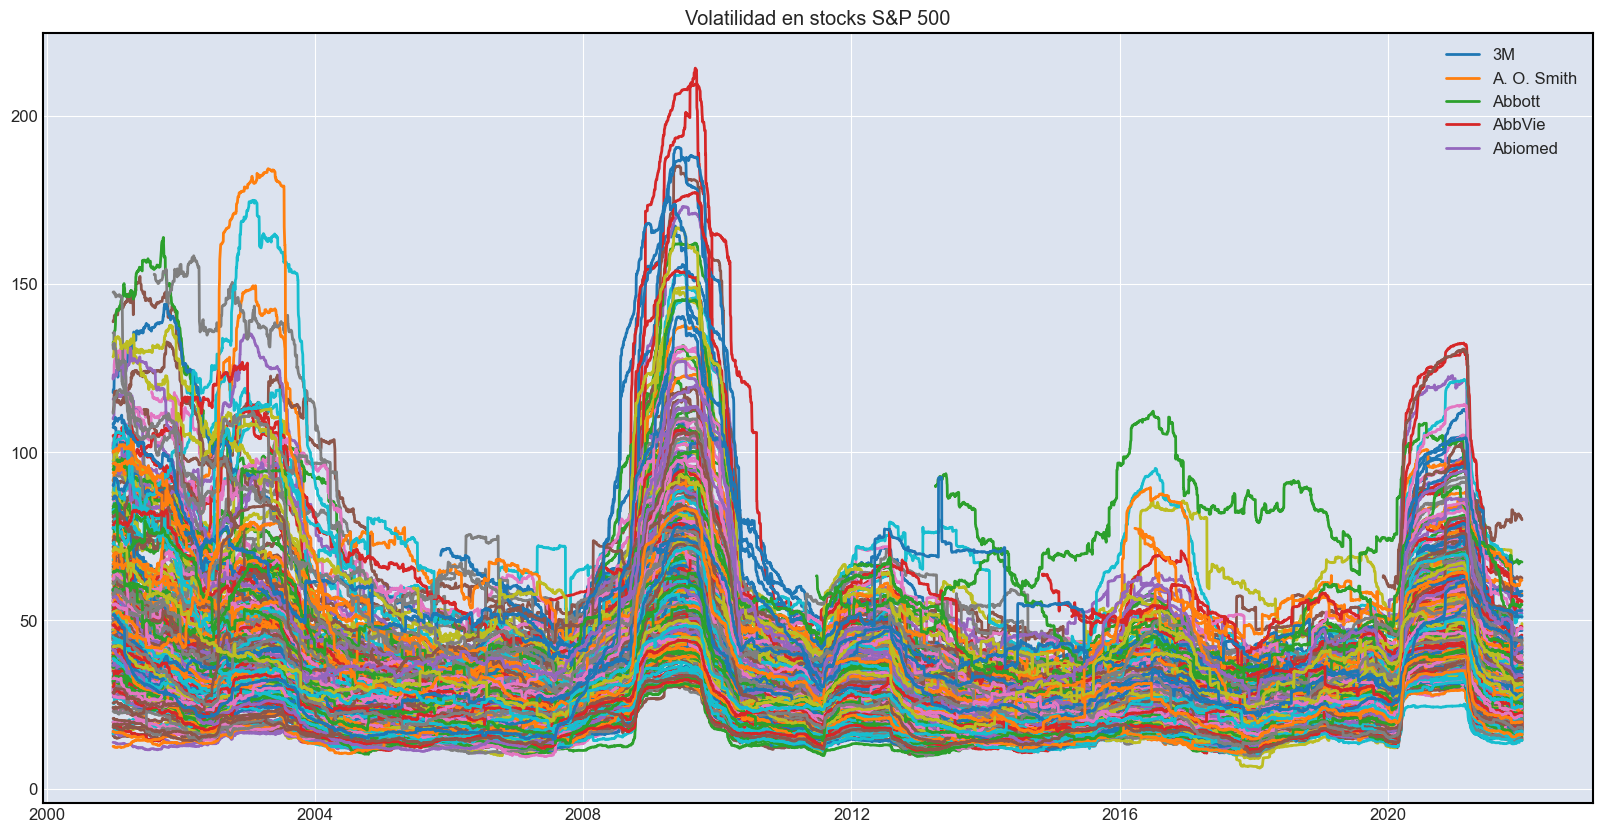

In [86]:
# Indice de volatilidad
fig = plt.figure(figsize =(20, 10))
for idx, stock in enumerate(stocks_history):
    plt.plot(stock.index ,stock.Volatilidad)
plt.legend(sp500.Security[0:5])
plt.title('Volatilidad en stocks S&P 500')
plt.show()

DataFrame de volatilidad

In [30]:
data1 = {
    'MMM' : list(stocks_history[0].Volatilidad)
}

volatilidad = pd.DataFrame(data1,
    index = stocks_history[0].index,
    columns = ['MMM']
    )

In [31]:
for idx, stock in enumerate(stocks_history):
    volatilidad[sp500.index[idx]] = stocks_history[idx].Volatilidad

C:\Users\exort\AppData\Local\Temp\ipykernel_5964\3029929136.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  volatilidad[sp500.index[idx]] = stocks_history[idx].Volatilidad
C:\Users\exort\AppData\Local\Temp\ipykernel_5964\3029929136.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  volatilidad[sp500.index[idx]] = stocks_history[idx].Volatilidad
C:\Users\exort\AppData\Local\Temp\ipykernel_5964\3029929136.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

In [32]:
#volatilidad = volatilidad.fillna(0)

In [33]:
volatilidad.iloc[245:255]

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-28,36.164455,39.390924,39.131108,NaN,96.567490,NaN,80.692537,36.914575,88.300732,38.135261,...,NaN,48.621296,NaN,28.565719,NaN,50.181236,70.629080,NaN,51.709381,NaN
2000-12-29,35.952794,39.372084,39.014260,NaN,96.624147,NaN,80.646622,36.975423,88.063982,38.135676,...,NaN,48.594463,NaN,28.491555,NaN,50.157839,70.975542,NaN,51.472132,NaN
2001-01-02,35.867856,39.385387,39.021297,NaN,96.913333,NaN,80.998480,37.030031,90.310436,38.177678,...,NaN,48.587312,NaN,28.389276,NaN,50.258941,71.055972,NaN,51.637362,NaN
2001-01-03,35.000265,39.537808,38.950794,NaN,97.346329,NaN,81.319599,37.290315,93.352131,38.222022,...,NaN,48.766626,NaN,28.609501,NaN,50.571583,71.661670,NaN,51.721476,NaN


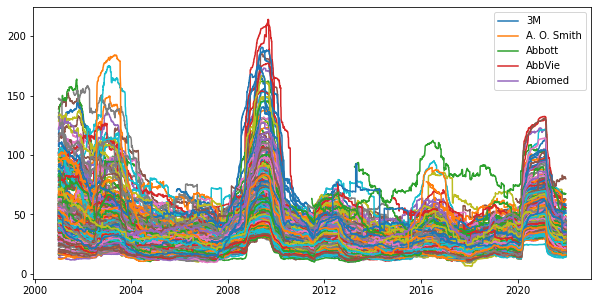

In [34]:
# Indice de volatilidad ponderado
fig = plt.figure(figsize =(10, 5))
for idx, stock in enumerate(stocks_history):
    plt.plot(stock.index[250:] ,stock.Volatilidad[250:])
plt.legend(sp500.Security[0:5])
plt.show()

Factores de ponderacion de stocks

In [35]:
# dataframe de factores para ponderacion
weight = copy.copy(volatilidad)

In [36]:
volatilidad.columns

Index(['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE',
       'ADP',
       ...
       'WTW', 'GWW', 'WYNN', 'XEL', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION',
       'ZTS'],
      dtype='object', length=502)

In [37]:
# Vector de factores de ponderacion
#marketCap = np.zeros((volatilidad.shape[1],1))

# Obtener la capitalizacion de mercado de cada empresa
#for idx, stock in enumerate(volatilidad.columns):
#    marketCap[idx] = yf.Ticker(stock).info['marketCap']

# Convertir array en data frame
#df = pd.DataFrame(marketCap)

# Guardar pesos en un csv porque es muy tardado descargar los datos
#df.to_csv('marketCap.csv')

In [38]:
# Cargamos csv de marketCap
marketCap = pd.read_csv('marketCap.csv')

# Eliminamos nulos con la media
marketCap['0'] = marketCap['0'].fillna(27299205120.0)

marketCap = marketCap[:sp500.shape[0]]

# Lo guardamos en un array
marketCap = np.array(marketCap['0'])



In [39]:
weight.iloc[245:255]

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-28,36.164455,39.390924,39.131108,NaN,96.567490,NaN,80.692537,36.914575,88.300732,38.135261,...,NaN,48.621296,NaN,28.565719,NaN,50.181236,70.629080,NaN,51.709381,NaN
2000-12-29,35.952794,39.372084,39.014260,NaN,96.624147,NaN,80.646622,36.975423,88.063982,38.135676,...,NaN,48.594463,NaN,28.491555,NaN,50.157839,70.975542,NaN,51.472132,NaN
2001-01-02,35.867856,39.385387,39.021297,NaN,96.913333,NaN,80.998480,37.030031,90.310436,38.177678,...,NaN,48.587312,NaN,28.389276,NaN,50.258941,71.055972,NaN,51.637362,NaN
2001-01-03,35.000265,39.537808,38.950794,NaN,97.346329,NaN,81.319599,37.290315,93.352131,38.222022,...,NaN,48.766626,NaN,28.609501,NaN,50.571583,71.661670,NaN,51.721476,NaN


In [40]:
for idx, fecha in enumerate(weight.index):
    weight.iloc[idx] += marketCap
    mask = weight.iloc[idx].index[weight.iloc[idx] > 0]
    weight.loc[fecha, mask] /= weight.loc[fecha, mask].sum()

In [41]:
## Rellenamos los espacios NaN con 0 para poder hacer el producto punto

# Dataframe auxiliar
aux = copy.copy(volatilidad.fillna(0))

# weights
weight = weight.fillna(0)

In [42]:
# Vector de volatilidad ponderado
v = np.zeros((weight.shape[0],1))

# Multiplicar peso por indice de volatilidad
for idx in range(0,weight.shape[0]):
    v[idx] = np.dot(aux.iloc[idx], weight.iloc[idx])

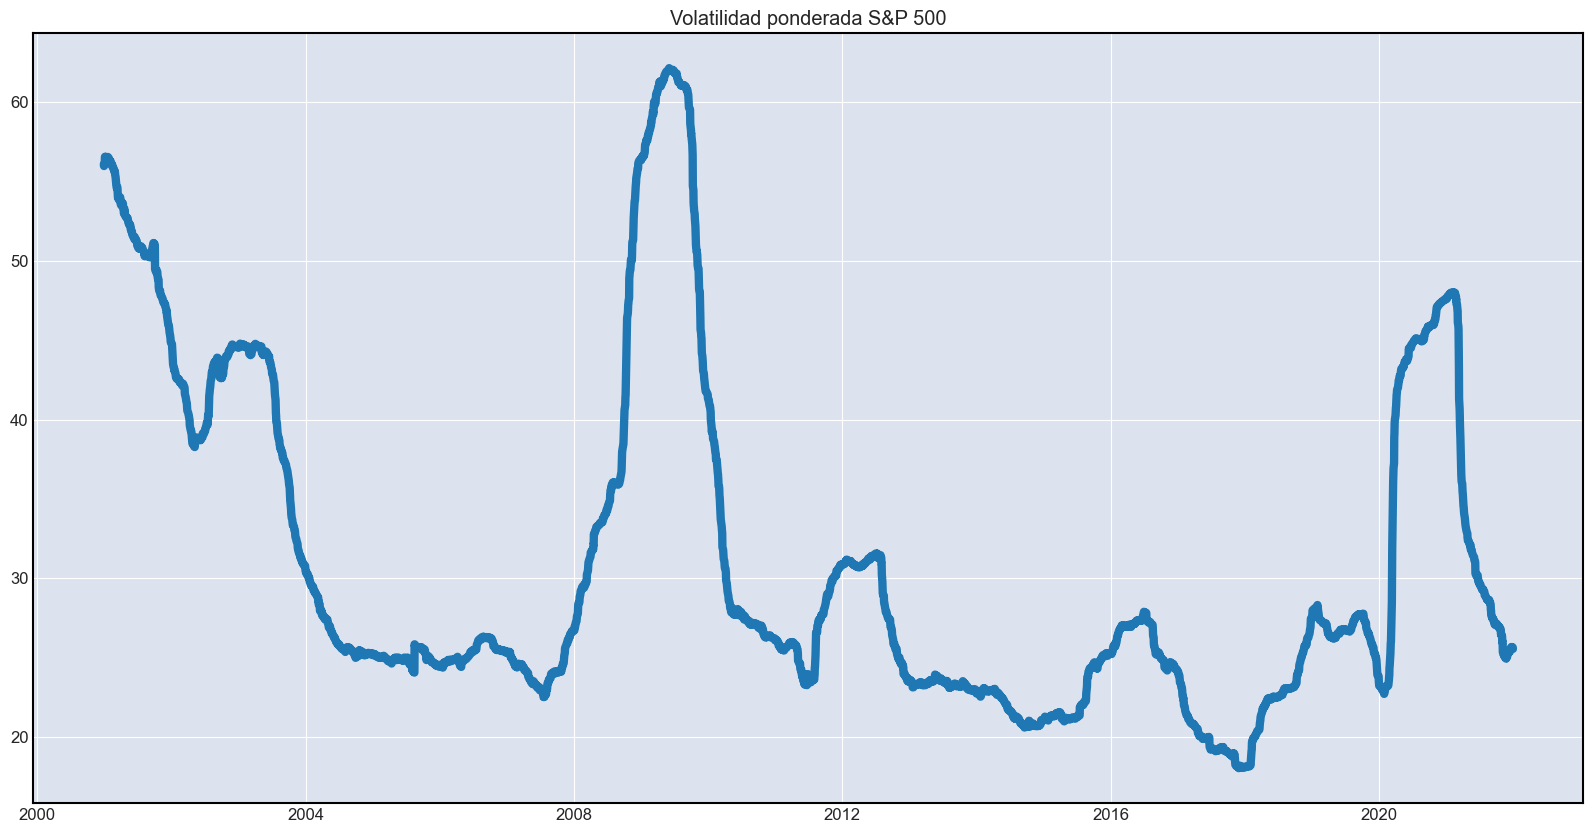

In [87]:
fig = plt.figure(figsize =(20, 10))
plt.plot(volatilidad.index[250:] ,v[250:], linewidth=6)
plt.title('Volatilidad ponderada S&P 500')
plt.show()

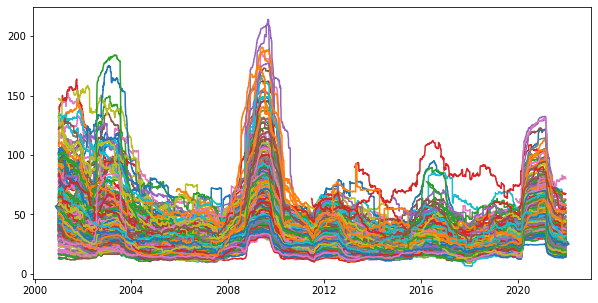

In [44]:
# Indice de volatilidad ponderado
fig = plt.figure(figsize =(10, 5))
plt.plot(volatilidad.index[250:] ,v[250:], linewidth=6)
for idx, stock in enumerate(stocks_history):
    plt.plot(stock.index ,stock.Volatilidad)
plt.show()

Descargar y tranformar datos del S&P 500

In [45]:
sp = yf.download('ES=F', start="2000-01-01", end="2021-12-31")

# Columna del dia de la semana: DayOfWeek
sp['DayOfWeek'] = sp.index.day_name()

# Columna de los retornos gap_logs
sp['retornos_gaps'] =np.log(sp.Open/sp.Close.shift(1)).fillna(0)

# Retorno Intraday
sp['intraday_log'] =np.log(sp.Close/sp.Open).fillna(0)

# Calculo de volatilidad
variaciones = stock['Adj Close'].pct_change()
sp['Volatilidad'] = variaciones.rolling(250).std()*100*(250)**0.5

[*********************100%***********************]  1 of 1 completed


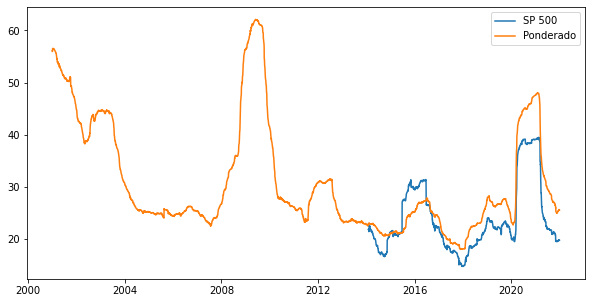

In [46]:
# Comparacion Indice de volatilidad ponderado con Indice de volatilidad S&P 500
fig = plt.figure(figsize =(10, 5))
plt.plot(sp.index,sp.Volatilidad)
plt.plot(volatilidad.index[250:] ,v[250:])#, linewidth=6)
# Legends
legends = ['SP 500', 'Ponderado']
plt.legend(legends)
plt.show()

In [47]:
# Imprimimos el grafico del S&P 500 con el indice de volatilidad ponderado
sp_copy = copy.copy(sp)
sp_copy['Volume'] = v[154:]

c:\Users\exort\AppData\Local\Programs\Python\Python39\lib\site-packages\mplfinance\_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


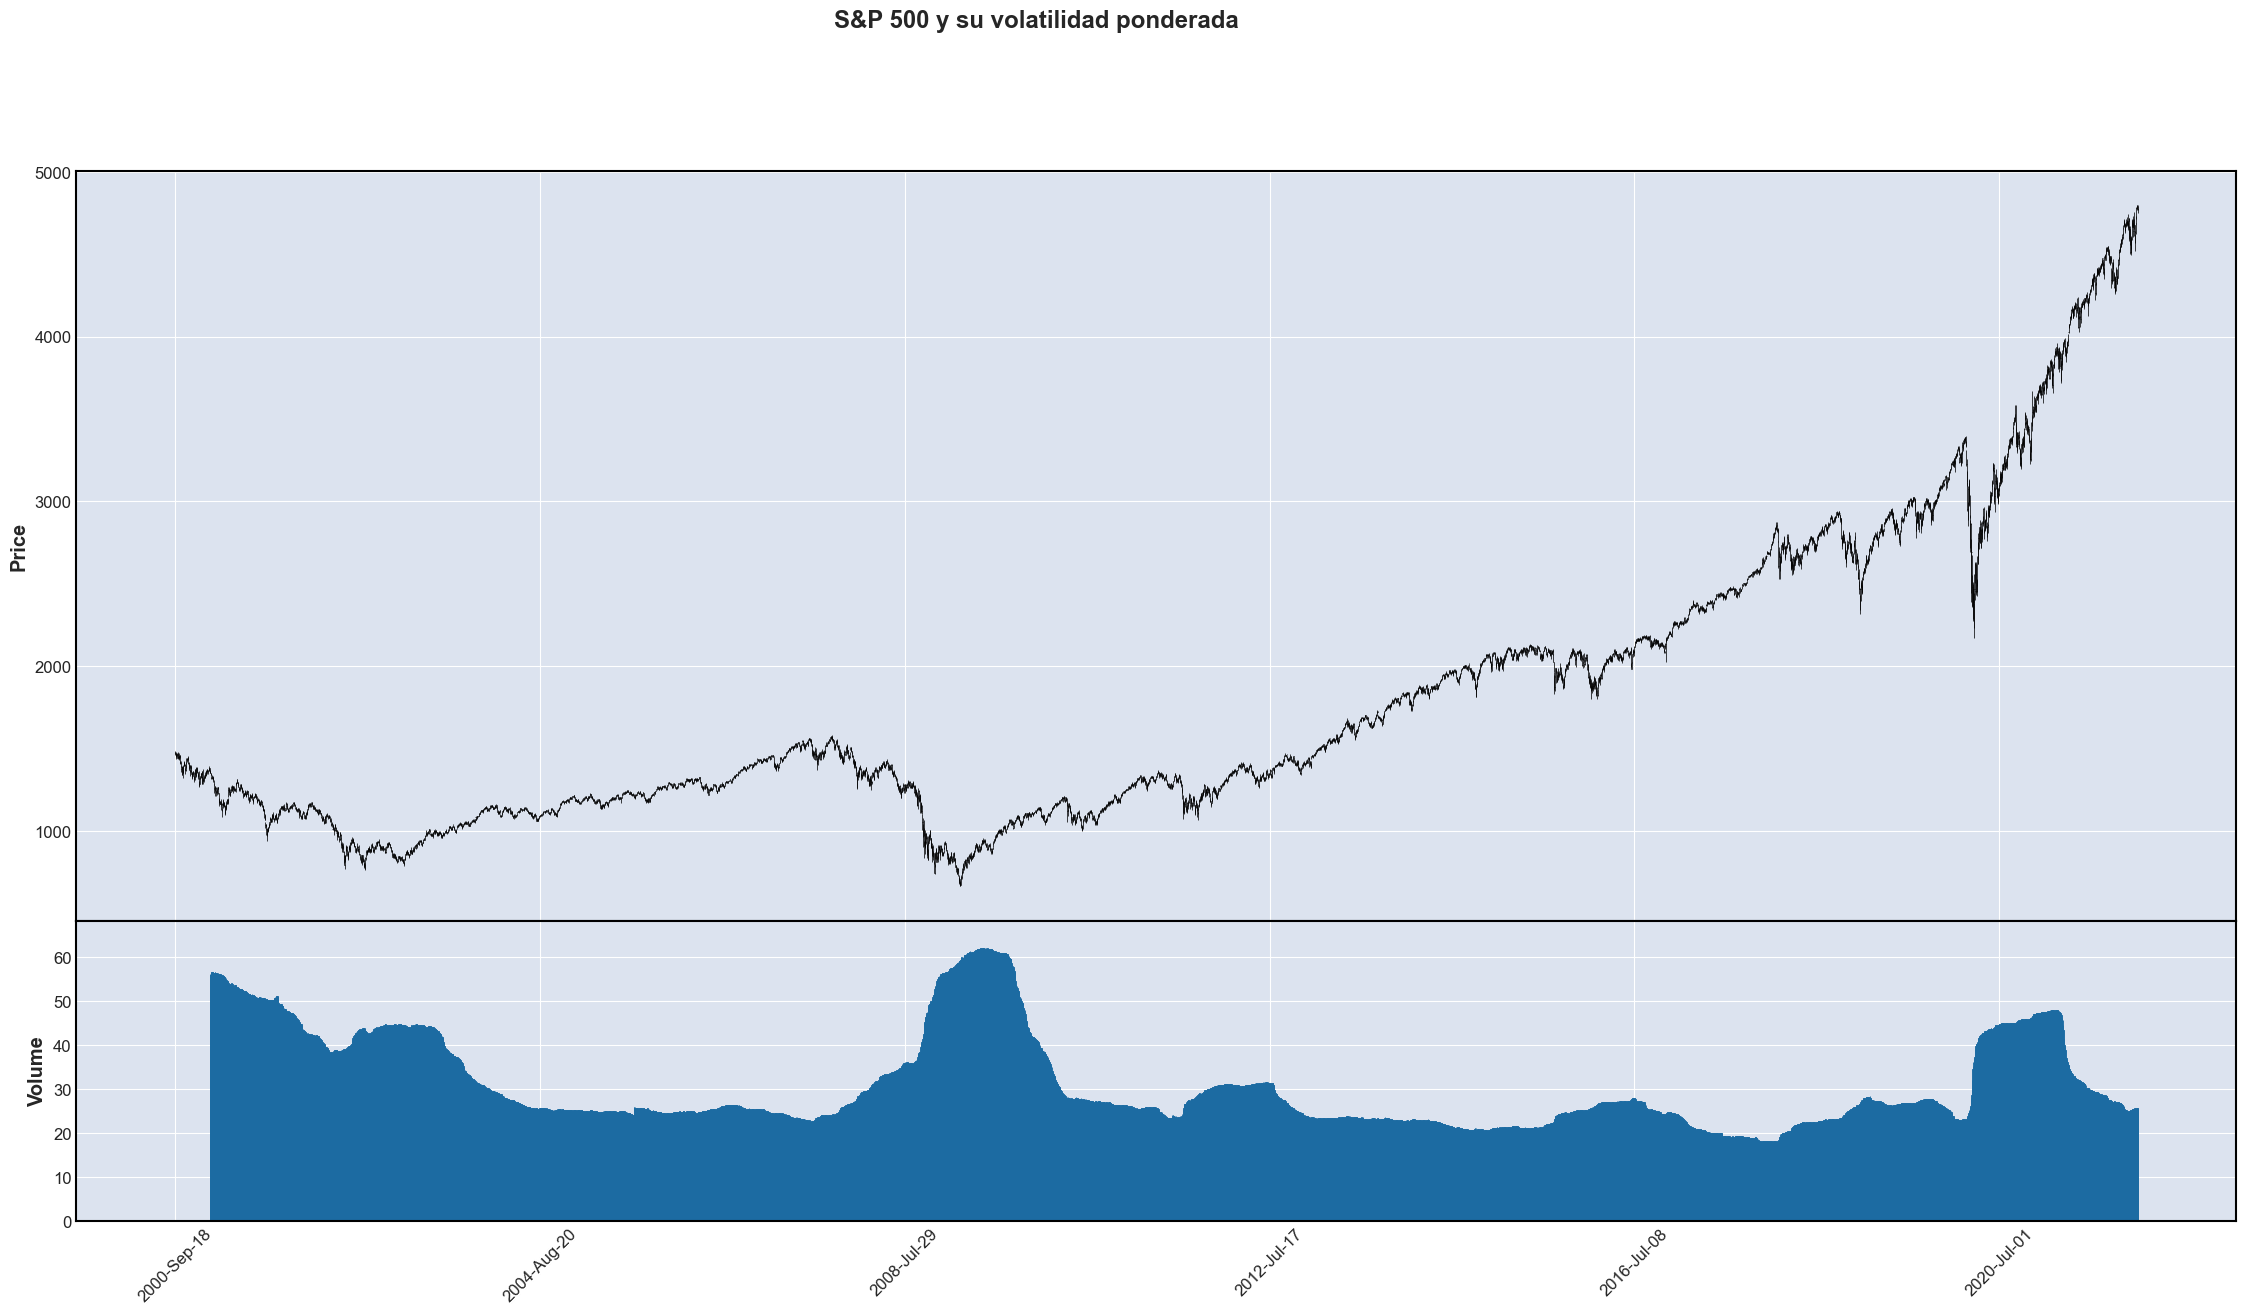

In [89]:
#fig = plt.figure(figsize =(30, 15))
mpf.plot(sp_copy,volume=True,figsize =(30, 15), title='S&P 500 y su volatilidad ponderada')

Sector mas rentable del S&P 500

In [49]:
# Vamos a hacer una suma en el rendimiento
sector = sp500.Sector.unique()

# dataframe auxiliar
aux = sp500.reset_index()

In [50]:
sector

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Staples',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Energy'], dtype=object)

In [51]:
# Calculamos el tamaño necesario de la matriz de rendimientos por sector
m = 0
for i in sector:
    if sp500[sp500.Sector == i].shape[0] > m:
        m = sp500[sp500.Sector == i].shape[0]
m

74

In [52]:
# Declaramos el array de rendimiento
rendimiento_sector = np.zeros((m,sector.shape[0]))

In [53]:
# Calculamos el retorno por sector para los gaps
for idx, sec in enumerate(sector):
    s = aux.index[sp500.Sector == sec]
    for idy, company in enumerate(s):
        rendimiento_sector[idy, idx] = stocks_history[company].retornos_gaps_logs.sum()

In [54]:
for idx in range(0,rendimiento_sector.shape[1]):
    rendimiento_sector[:,idx][rendimiento_sector[:,idx] == 0] = np.median(rendimiento_sector[:,idx][rendimiento_sector[:,idx] != 0])

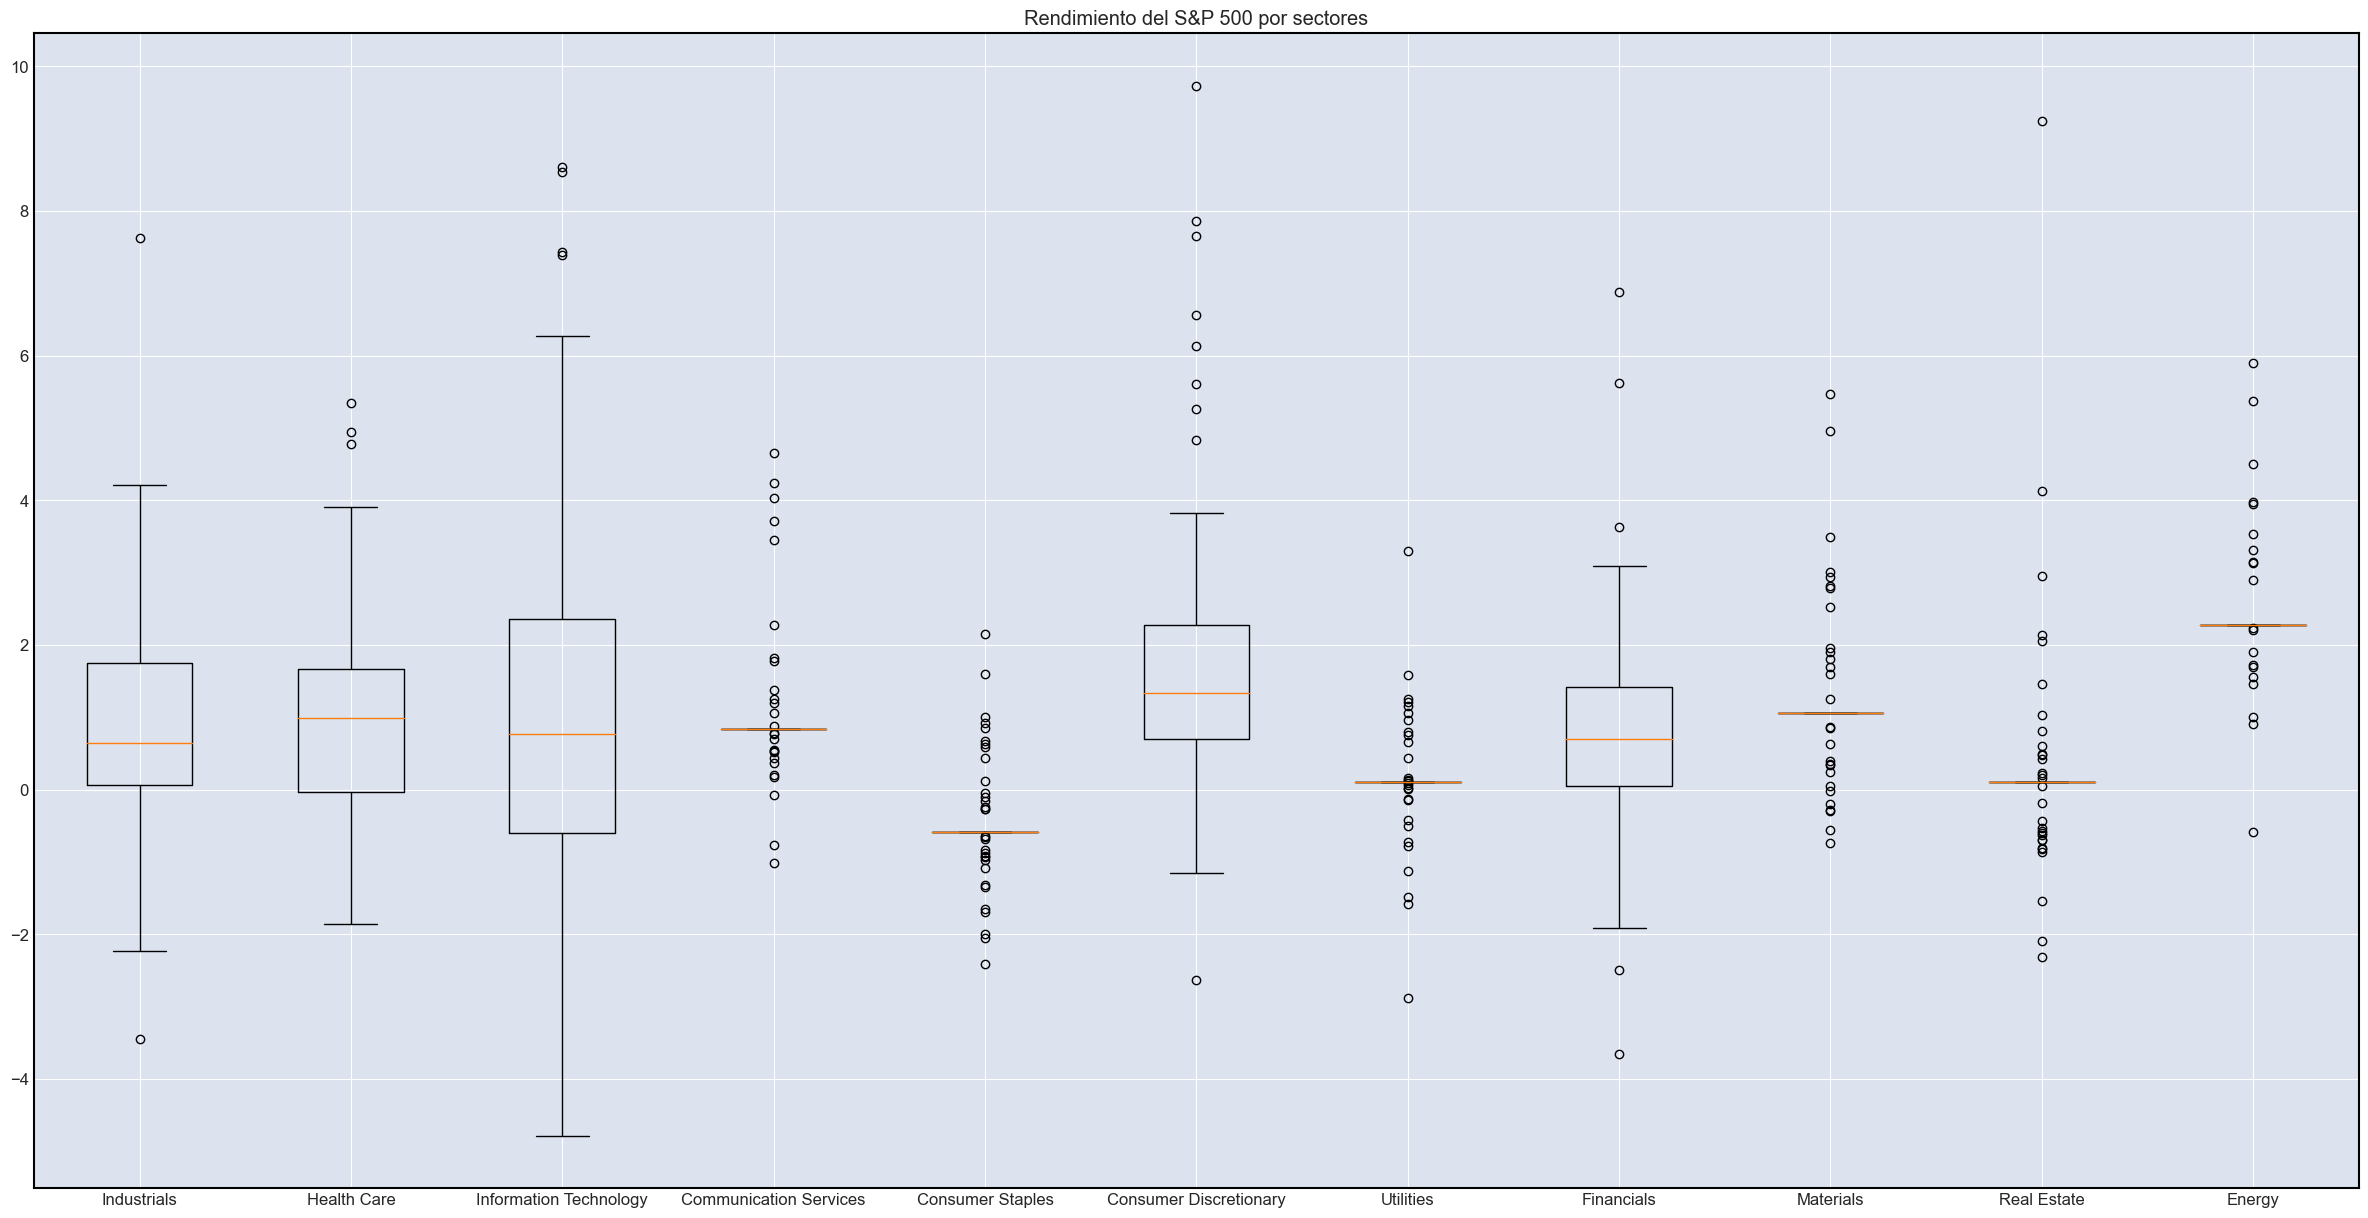

In [90]:
# Rendimiento por sector
fig = plt.figure(figsize =(30, 15))
plt.boxplot(rendimiento_sector)
plt.title("Rendimiento del S&P 500 por sectores")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11], sector)
plt.show()

Mejores empresas para invertir

Estrategia gap

In [65]:
# Encontraremos las mejores acciones para invertir con la estrategia gap el dia martes, pues es el mejor dia para invertir en gap
#stock.retornos_gaps_logs[stock.DayOfWeek == day][1:].sum()

# Declaramos vector de desviacion estandar
std = np.zeros((len(stocks_history),1))
# Declaramos vector de rendimiento
rend = np.zeros((len(stocks_history),1))
# Declaramos vector de resultados rend/des_std
rend_std = np.zeros((len(stocks_history),1))
# indices
indx = np.array(list(range(0,len(stocks_history))))

# calculamos indice compuesto
for idx, stock in enumerate(stocks_history):
    std[idx] = stock.retornos_gaps_logs[stock.DayOfWeek == 'Tuesday'][1:].std()**0.5
    rend[idx] = stock.retornos_gaps_logs[stock.DayOfWeek == 'Tuesday'][1:].sum()

rend_std = rend/std

# obtenemos las mejores empresas
idx_companies = []

amount_companies = 9

for i in range(0,amount_companies):
    idx_companies.append(indx[(rend_std == max(rend_std)).sum(axis=1) == 1].sum())
    rend_std[(rend_std == max(rend_std)).sum(axis=1) == 1] = 0

best_companies = sp500.index[idx_companies]
print(best_companies)
print(idx_companies)
print(rend[idx_companies])

Index(['MGM', 'MU', 'AAL', 'VLO', 'F', 'ON', 'C', 'AKAM', 'BKNG'], dtype='object')
[310, 312, 30, 465, 202, 353, 112, 15, 72]
[[2.89658156]
 [2.7438233 ]
 [2.73504974]
 [2.17311698]
 [2.30043562]
 [2.49962474]
 [2.25602505]
 [2.16616597]
 [2.28545623]]


In [95]:
sp500.loc[best_companies]

,Security,Sector
MGM,MGM Resorts,Consumer Discretionary
MU,Micron Technology,Information Technology
AAL,American Airlines Group,Industrials
VLO,Valero Energy,Energy
F,Ford Motor Company,Consumer Discretionary
ON,ON Semiconductor,Information Technology
C,Citigroup,Financials
AKAM,Akamai,Information Technology
BKNG,Booking Holdings,Consumer Discretionary


c:\Users\exort\AppData\Local\Programs\Python\Python39\lib\site-packages\mplfinance\_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


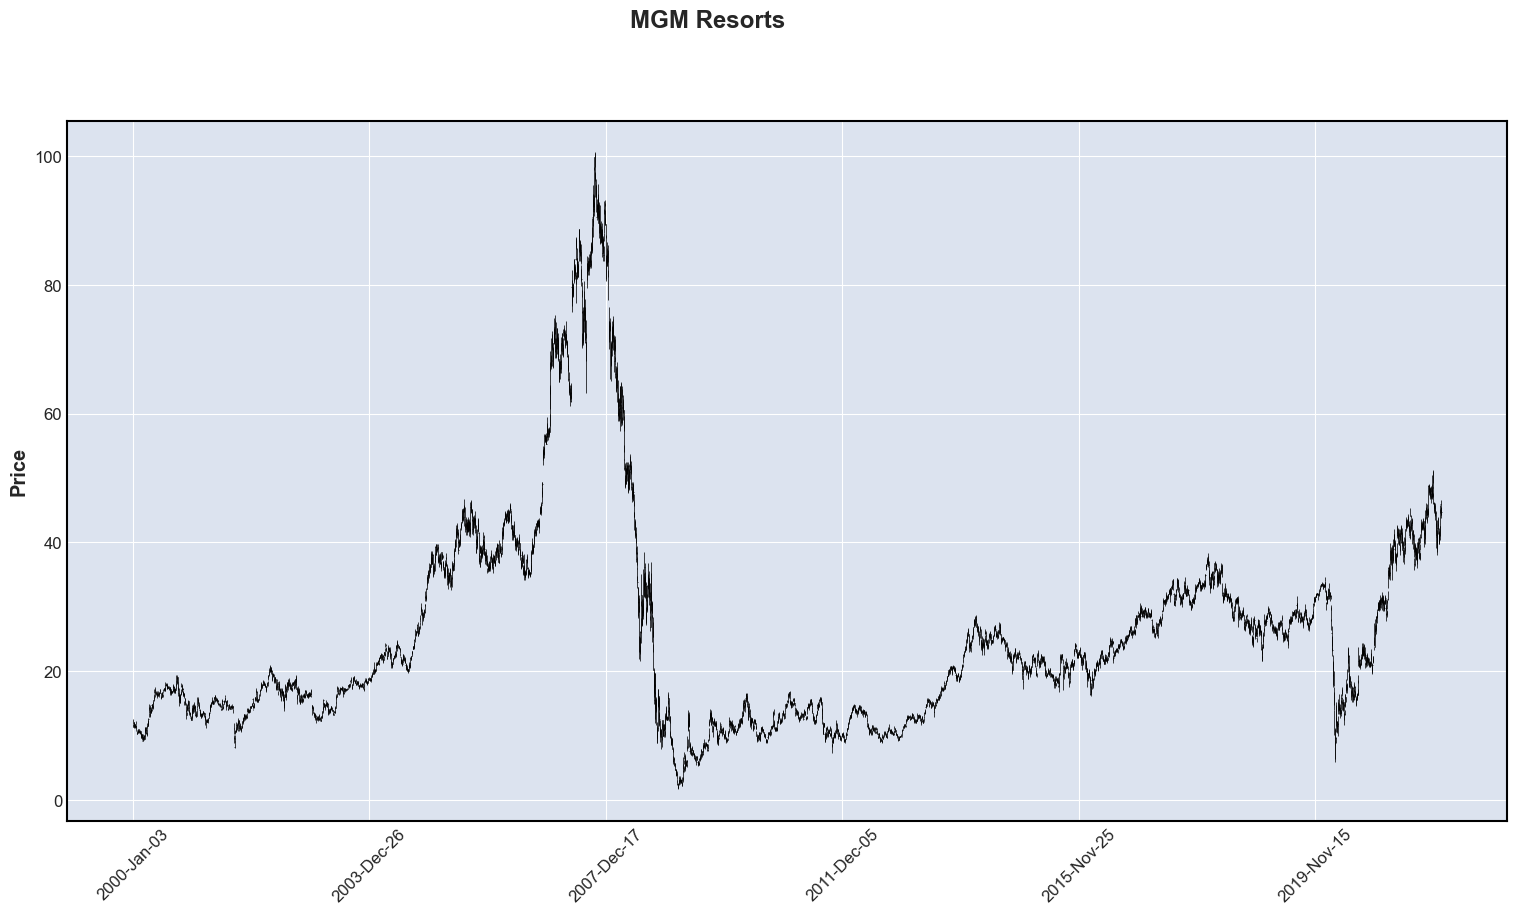

In [91]:
mpf.plot(stocks_history[310],figsize =(20, 10),title=sp500.Security.iloc[310])

In [66]:
r = np.zeros((5536,stocks_history[0].shape[1]))

for ydx, k in enumerate(idx_companies):
    # Construimos una simulacion de rendimiento
    akm = stocks_history[k].retornos_gaps_logs
    h = np.zeros((akm.shape[0],1))

    h[0] = 0
    f = False
    for idx, i in enumerate(akm):
        if f:
            h[idx] = h[idx-1]+(i)
        else:
            f = True
    
    size = h.shape[0]

    r[(5536-size):,ydx] = h.sum(axis=1)


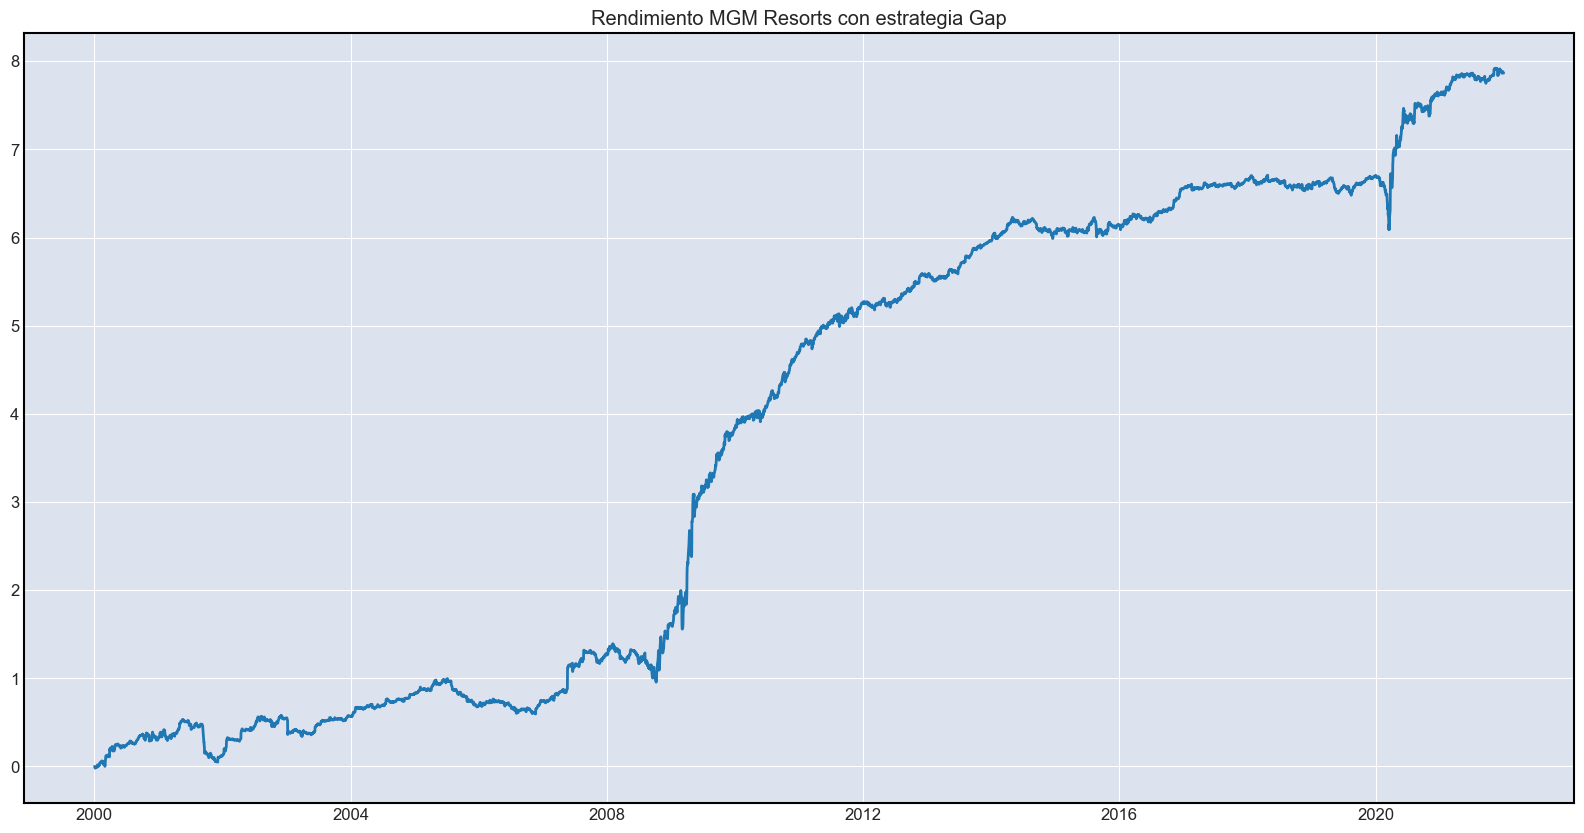

In [92]:
fig = plt.figure(figsize =(20, 10))
plt.plot(stocks_history[310].index,r[1:,0])
plt.title("Rendimiento MGM Resorts con estrategia Gap")
plt.show()

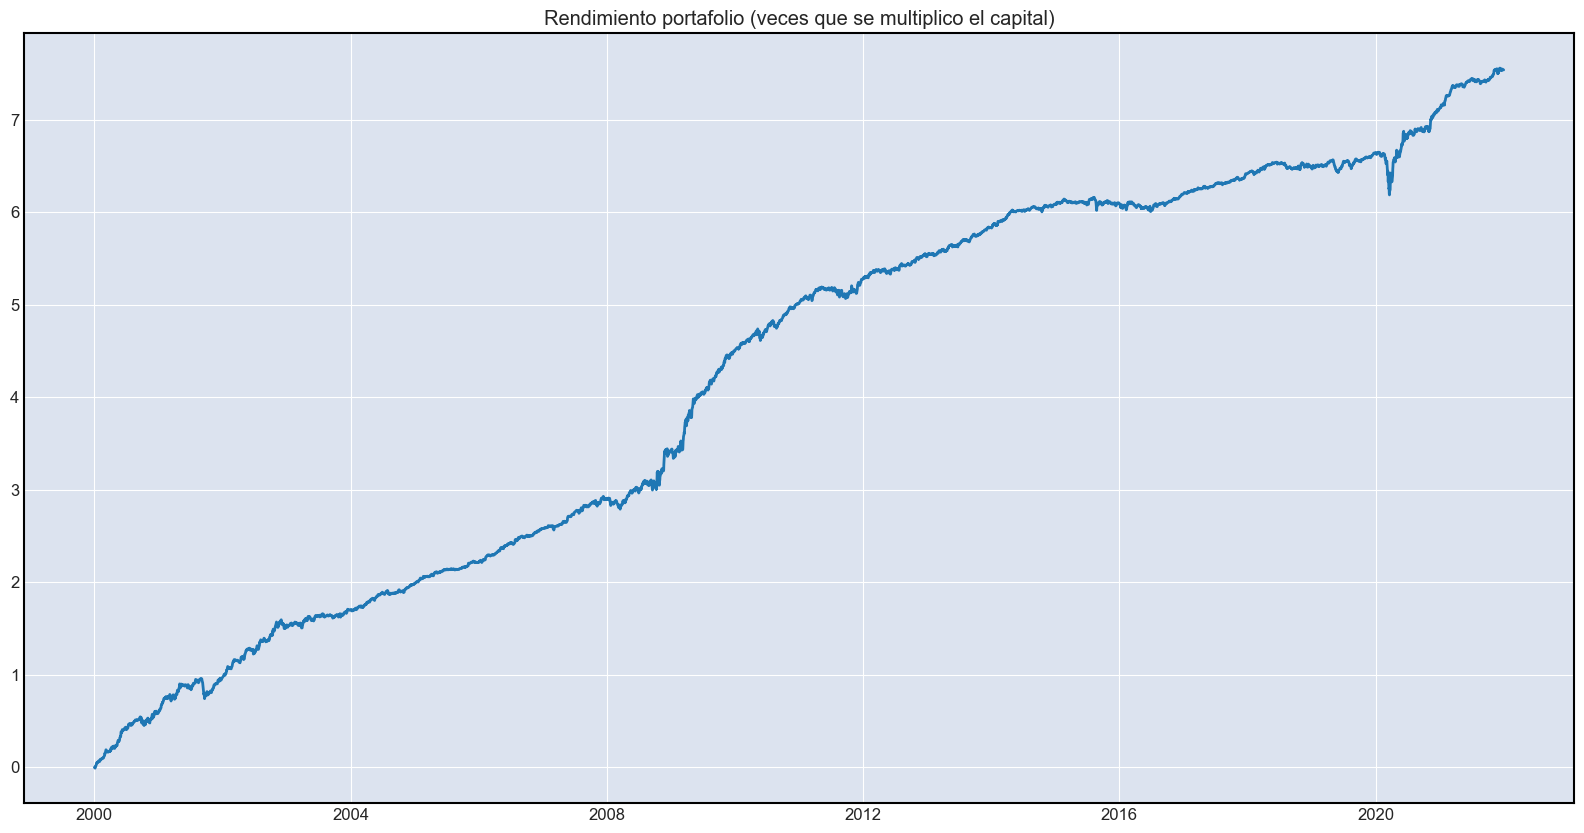

In [96]:
fig = plt.figure(figsize =(20, 10))
plt.plot(stocks_history[0].index,r[1:,:].sum(axis=1)/9)
plt.title("Rendimiento portafolio (veces que se multiplico el capital)")
plt.show()